# Importing Datasets

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Datasets

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning - Udemy/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Encoding Categorical Data 

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[-1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [4]:
print("X:\n{}".format(X))

X:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.7

# Splitting Dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2
                                                    , random_state = 0)

# Training Multiple Linear Regression on Training Set

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Predicting  for the Test Set

In [7]:
print("y_test:\n{}".format(y_test))
print("y_pred=\n{}".format(lr.predict(X_test)))

y_test:
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
y_pred=
[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


In [8]:
np.set_printoptions(precision = 2)
lr.predict(X_test) - y_test

array([  -267.18, -11677.12, -13674.21,  -5822.73, -12512.91,  11152.93,
       -13377.37,   1308.17,   3617.19,   1733.13])

In [9]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [10]:
lr.score(X_train, y_train)

0.9501847627493607

In [11]:
lr.score(X_test, y_test)

0.9347068473282515

# Predicting for single value

In [12]:
lr.predict([[1,0,0,160000,130000,300000]])

array([181566.92])

# Finding Equation

In [13]:
lr.intercept_

42467.52924853204

In [14]:
lr.coef_

array([ 8.66e+01, -8.73e+02,  7.86e+02,  7.73e-01,  3.29e-02,  3.66e-02])

## Ridge and Lasso Regression

In [15]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [21]:
ridge.coef_

array([ 2.51e+01, -4.43e+02,  4.18e+02,  7.76e-01,  3.12e-02,  3.57e-02])

In [22]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [23]:
lasso.coef_

array([-0.00e+00, -9.16e+02,  6.68e+02,  7.74e-01,  3.27e-02,  3.65e-02])

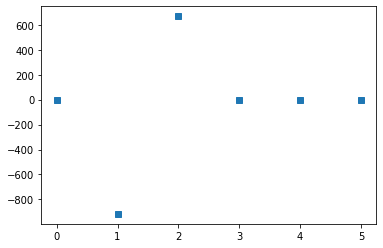

In [27]:
plt.plot(lasso.coef_, 's')